# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



#IMPORT LIBRARIES AND DATASET

In [ ]:
#conda install -c conda-forge fbprophet


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: fbprophet


In [ ]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet


In [ ]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv("avocado.csv")


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [ ]:
# Let's view the head of the training dataset
avocado_df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Let's view the last elements in the training dataset
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,1/7/2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
avacado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# EXPLORE DATASET  

In [ ]:
avocado_df = avocado_df.sort_values('Date')

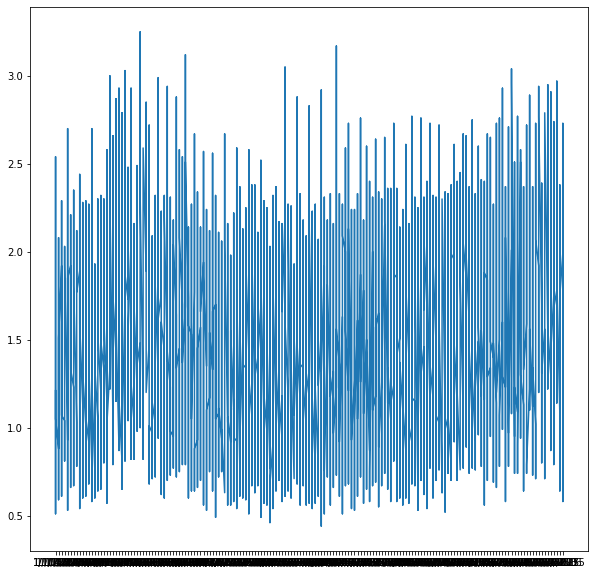

In [ ]:
# Plot date and average price
plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


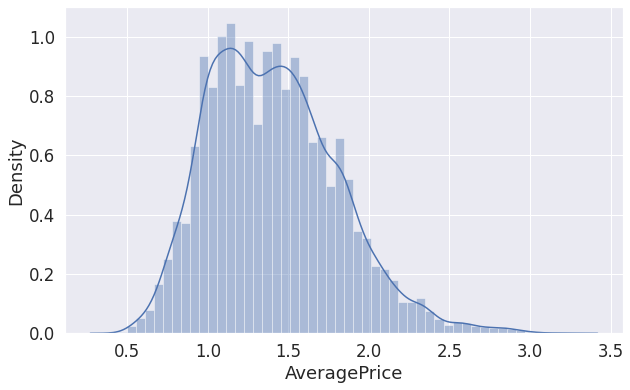

In [ ]:
# Plot distribution of the average price
plt.figure(figsize = (10,6))
sns.distplot(avocado_df['AveragePrice'], color = 'b')

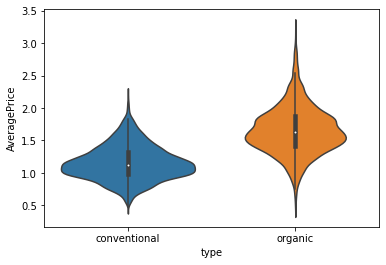

In [ ]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y = 'AveragePrice', x = 'type', data = avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

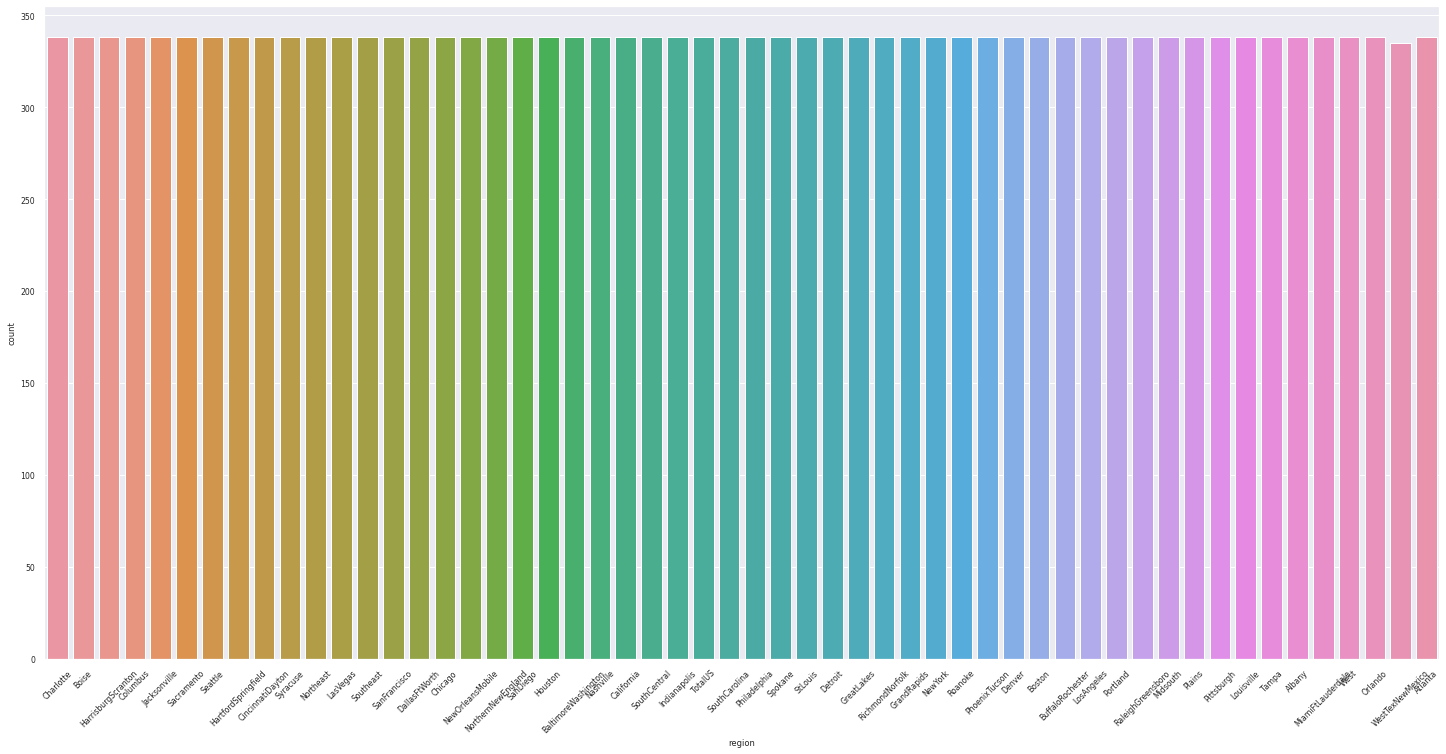

In [ ]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

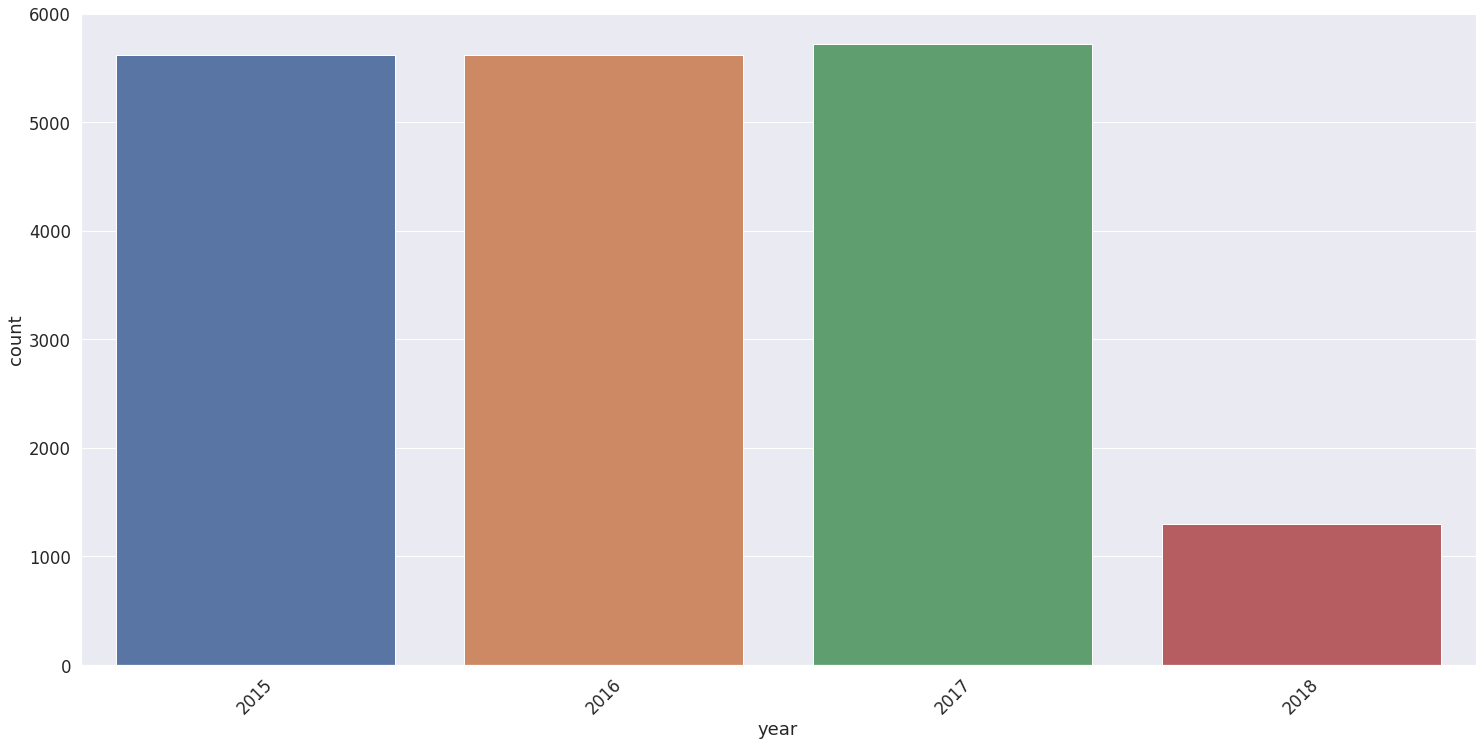

In [ ]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


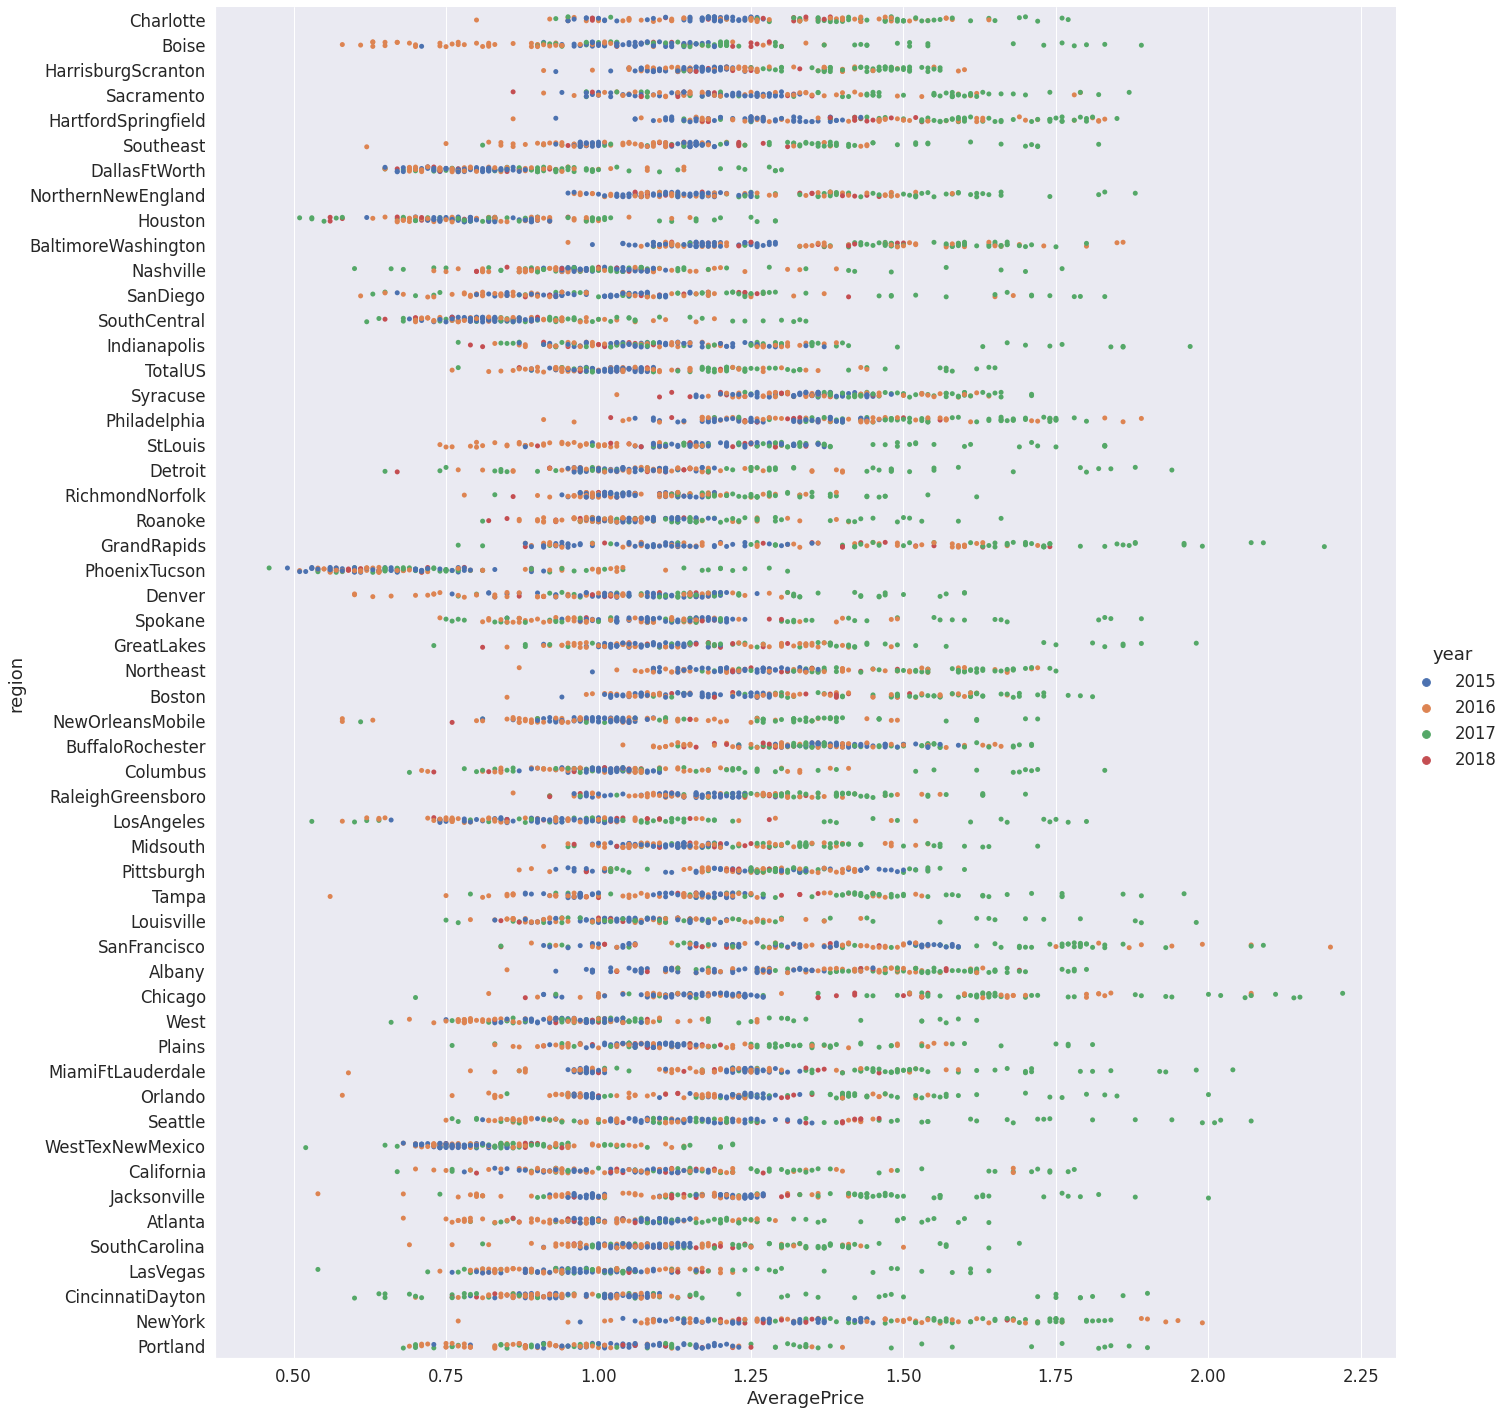

In [ ]:
 # plot the avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type'] == 'conventional'], hue = 'year', height = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


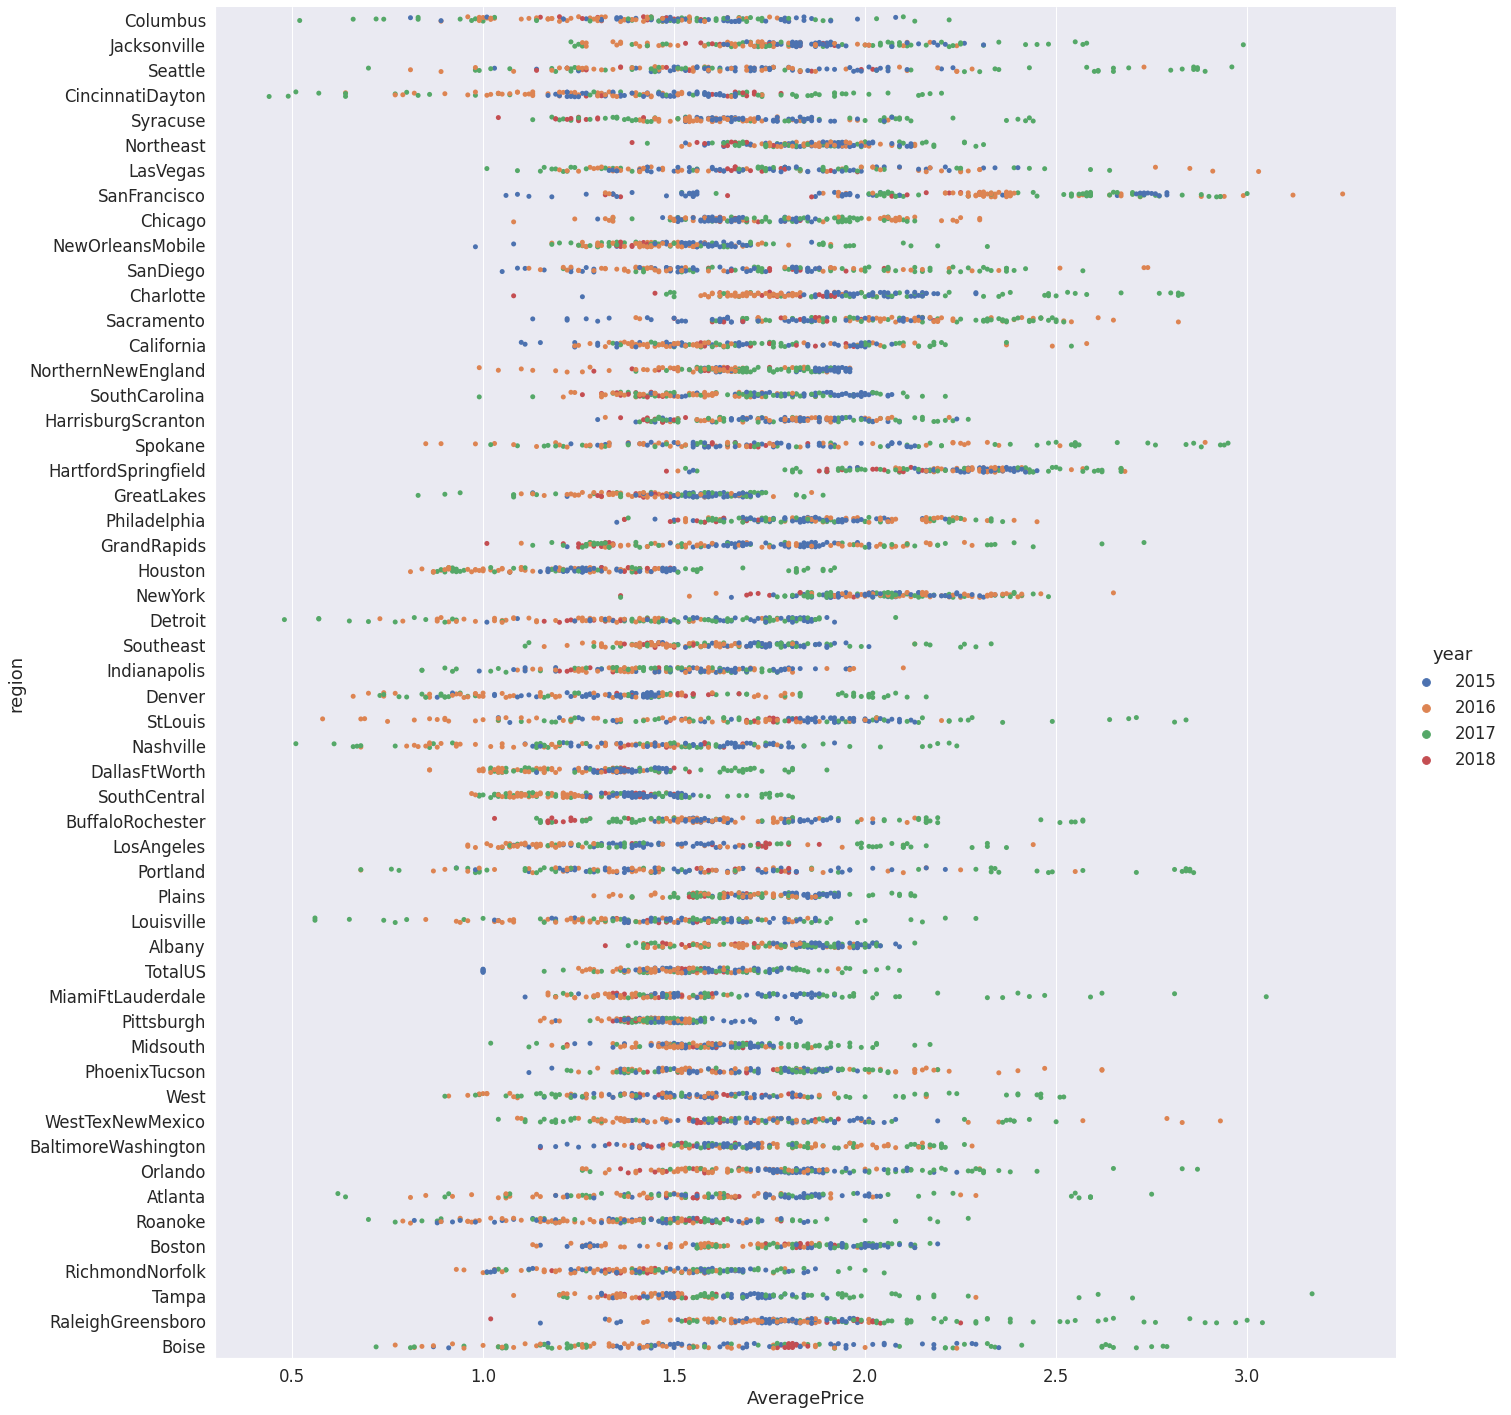

In [ ]:
# plot the avocado prices vs. regions for organic avocados
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type'] == 'organic'], hue = 'year', height = 20)

#PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [ ]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6039,52,1/1/2017,1.21,217051.50,47765.32,94571.69,15036.44,59678.05,45920.26,13711.12,46.67,conventional,2017,Charlotte
5827,52,1/1/2017,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,conventional,2017,Boise
6516,52,1/1/2017,1.35,235430.29,41800.77,136109.66,420.83,57099.03,52817.14,4281.89,0.00,conventional,2017,HarrisburgScranton
15323,52,1/1/2017,1.58,5948.66,772.98,2724.28,0.00,2451.40,2273.79,177.61,0.00,organic,2017,Columbus
15853,52,1/1/2017,1.24,3707.67,245.43,38.31,2.39,3421.54,910.00,2511.54,0.00,organic,2017,Jacksonville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,16,9/6/2015,1.62,2794.65,321.17,1731.98,0.00,741.50,413.33,328.17,0.00,organic,2015,Indianapolis
2200,16,9/6/2015,1.54,646810.20,154276.07,384033.22,30732.28,77768.63,76963.49,805.14,0.00,conventional,2015,SanFrancisco
10182,16,9/6/2015,2.07,2016.06,1096.25,55.10,8.04,856.67,856.67,0.00,0.00,organic,2015,Jacksonville
900,16,9/6/2015,1.27,281256.19,3976.35,221997.70,497.89,54784.25,52839.06,1945.19,0.00,conventional,2015,HartfordSpringfield


In [ ]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [ ]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'} )

In [ ]:
avocado_prophet_df

,ds,y
6039,1/1/2017,1.21
5827,1/1/2017,0.92
6516,1/1/2017,1.35
15323,1/1/2017,1.58
15853,1/1/2017,1.24
...,...,...
10130,9/6/2015,1.62
2200,9/6/2015,1.54
10182,9/6/2015,2.07
900,9/6/2015,1.27


# DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [ ]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496809,0.877477,1.851083,1.496809,1.496809,-0.114347,-0.114347,-0.114347,-0.114347,-0.114347,-0.114347,0.0,0.0,0.0,1.382462
1,2015-01-11,1.491753,0.914167,1.874967,1.491753,1.491753,-0.105687,-0.105687,-0.105687,-0.105687,-0.105687,-0.105687,0.0,0.0,0.0,1.386066
2,2015-01-18,1.486696,0.880462,1.868453,1.486696,1.486696,-0.105225,-0.105225,-0.105225,-0.105225,-0.105225,-0.105225,0.0,0.0,0.0,1.381471
3,2015-01-25,1.481639,0.891474,1.853274,1.481639,1.481639,-0.124076,-0.124076,-0.124076,-0.124076,-0.124076,-0.124076,0.0,0.0,0.0,1.357564
4,2015-02-01,1.476583,0.888517,1.812828,1.476583,1.476583,-0.152275,-0.152275,-0.152275,-0.152275,-0.152275,-0.152275,0.0,0.0,0.0,1.324308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161235,0.577981,1.615209,0.979930,1.364939,-0.085411,-0.085411,-0.085411,-0.085411,-0.085411,-0.085411,0.0,0.0,0.0,1.075824
530,2019-03-22,1.160500,0.583787,1.586332,0.978874,1.364965,-0.083692,-0.083692,-0.083692,-0.083692,-0.083692,-0.083692,0.0,0.0,0.0,1.076808
531,2019-03-23,1.159765,0.599693,1.608692,0.976814,1.364882,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,0.0,0.0,0.0,1.078068
532,2019-03-24,1.159031,0.561265,1.640564,0.975164,1.364777,-0.079448,-0.079448,-0.079448,-0.079448,-0.079448,-0.079448,0.0,0.0,0.0,1.079583


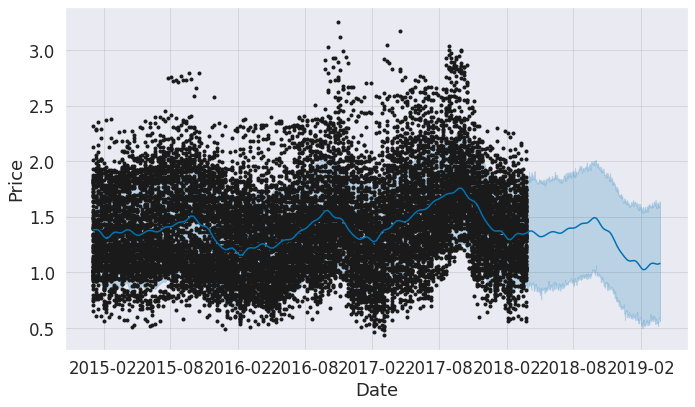

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

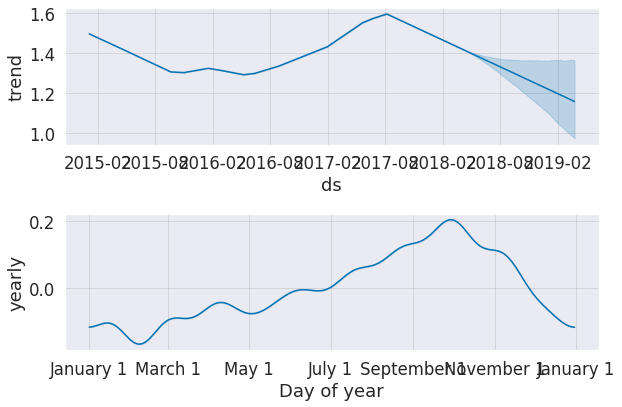

In [ ]:
figure1 = m.plot_components(forecast)

#DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC)

In [ ]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


In [ ]:
# Select specific region
avocado_df_sample = avocado_df[avocado_df['region'] == 'Chicago']

In [ ]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


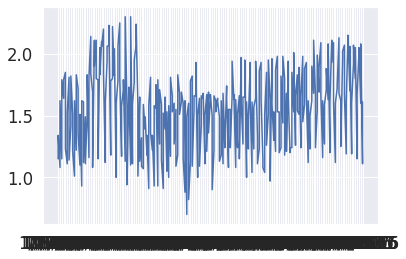

In [ ]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [ ]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [ ]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


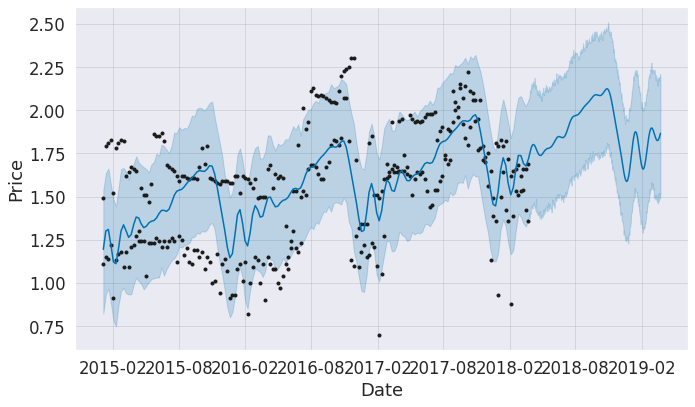

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

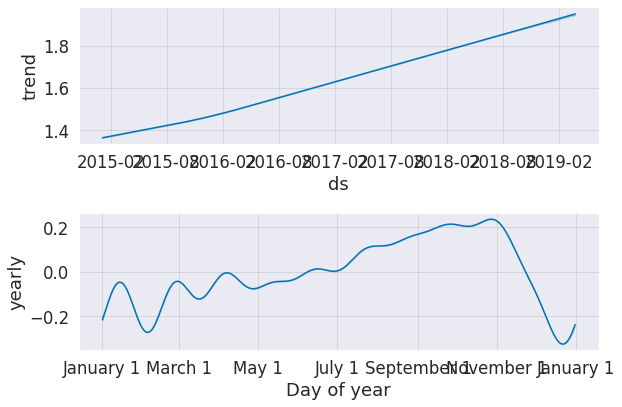

In [ ]:
figure3 = m.plot_components(forecast)